In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import folium
import json

In [2]:
file = 'tram/트램선로.geojson'
geo = json.load(open(file,encoding='utf-8'))

In [3]:
df= pd.read_csv('AutoTram_Map.csv')

In [4]:
geo

{'type': 'FeatureCollection',
 'crs': {'type': 'name',
  'properties': {'name': 'urn:ogc:def:crs:OGC:1.3:CRS84'}},
 'features': [{'type': 'Feature',
   'properties': {'id': None},
   'geometry': {'type': 'LineString',
    'coordinates': [[127.305672, 36.638751],
     [127.305736, 36.638783],
     [127.305743, 36.638786],
     [127.305753, 36.638791],
     [127.305765, 36.638796],
     [127.305776, 36.6388],
     [127.305798, 36.63881],
     [127.305806, 36.638813],
     [127.305812, 36.638814],
     [127.305834, 36.638819],
     [127.305876, 36.638825],
     [127.305943, 36.638829],
     [127.305955, 36.638828],
     [127.305982, 36.638823],
     [127.306016, 36.638811],
     [127.306047, 36.638799],
     [127.306052, 36.638796],
     [127.306095, 36.63877],
     [127.3061, 36.638767],
     [127.306135, 36.638736],
     [127.306163, 36.6387]]}},
  {'type': 'Feature',
   'properties': {'id': None},
   'geometry': {'type': 'LineString',
    'coordinates': [[127.311909, 36.633536],
     [

In [5]:
geo.keys()

dict_keys(['type', 'crs', 'features'])

In [6]:
feat = geo['features']
lat=[]
lon=[]
for i in range(len(feat)):
    x = feat[i]['geometry']['coordinates']
    for j in range(len(x)):
        lat.append(x[j][1])
        lon.append(x[j][0])

In [7]:
lat

[36.638751,
 36.638783,
 36.638786,
 36.638791,
 36.638796,
 36.6388,
 36.63881,
 36.638813,
 36.638814,
 36.638819,
 36.638825,
 36.638829,
 36.638828,
 36.638823,
 36.638811,
 36.638799,
 36.638796,
 36.63877,
 36.638767,
 36.638736,
 36.6387,
 36.633536,
 36.633431,
 36.633322,
 36.633179,
 36.633056,
 36.632919,
 36.632783,
 36.632646,
 36.632582,
 36.632516,
 36.632504,
 36.632487,
 36.632457,
 36.632441,
 36.638694,
 36.638719,
 36.63873,
 36.638735,
 36.638733,
 36.638729,
 36.638718,
 36.6387,
 36.6387,
 36.630424,
 36.630179,
 36.630018]

In [8]:
lon

[127.305672,
 127.305736,
 127.305743,
 127.305753,
 127.305765,
 127.305776,
 127.305798,
 127.305806,
 127.305812,
 127.305834,
 127.305876,
 127.305943,
 127.305955,
 127.305982,
 127.306016,
 127.306047,
 127.306052,
 127.306095,
 127.3061,
 127.306135,
 127.306163,
 127.311909,
 127.31198,
 127.312097,
 127.312255,
 127.312392,
 127.312545,
 127.312701,
 127.312855,
 127.312924,
 127.313006,
 127.313024,
 127.313048,
 127.313093,
 127.313128,
 127.305842,
 127.305912,
 127.305949,
 127.305987,
 127.306029,
 127.306068,
 127.306119,
 127.306163,
 127.306163,
 127.315372,
 127.315593,
 127.315773]

- distance

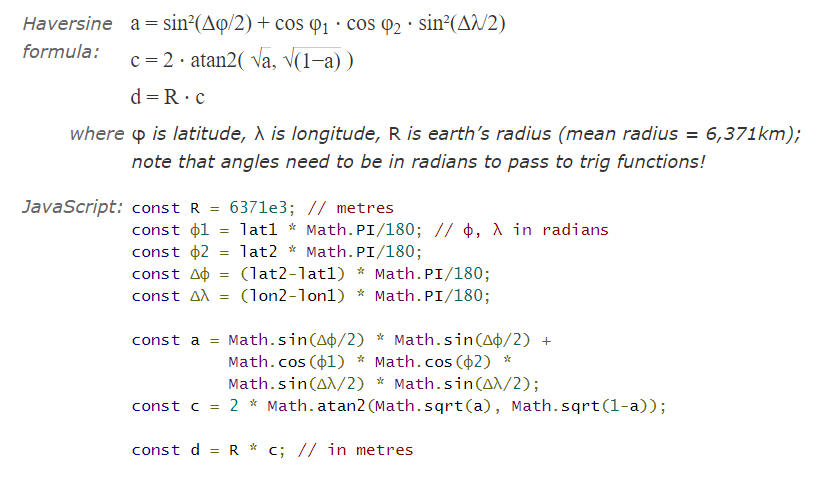

In [9]:
import math
R = 6731e3 # meter
x1 = lat[0]*math.pi/180
x2 = lat[1]*math.pi/180
dx = (lat[1]-lat[0]) * math.pi/180
dy = (lon[1]-lon[0]) * math.pi/180
a = math.sin(dx/2)**2 + math.cos(x1)*math.cos(x2)*math.sin(dy/2)*math.sin(dy/2)
c = 2*math.atan2(np.sqrt(a),np.sqrt(1-a))
d = R*c
print(d)

7.108429083106945


In [10]:
math.acos(math.sin(x1)*math.sin(x2)+math.cos(x1)*math.cos(x2)*math.cos(dy))*R

7.107846781608219

- Bearing

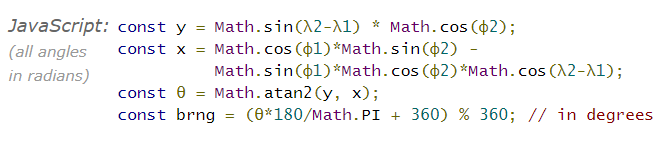

- 좌표 계산
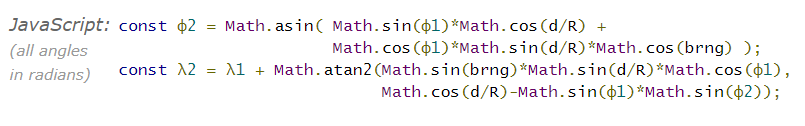

In [11]:
import math
import numpy as np
class calculator():
    def __init__(self,lat1,lat2,lon1,lon2):
        self.lat1 = lat1 # start lat
        self.lat2 = lat2 # end lat
        self.lon1 = lon1 # start lon
        self.lon2 = lon2 # end lon
        self.x1 = self.lat1*math.pi/180
        self.x2 = self.lat2*math.pi/180
        self.dx = (self.lat2-lat1) * math.pi/180 # seta_dev
        self.dy = (self.lon2-lon1) * math.pi/180 # lambda_dev
        self.R = 6378.1*1000 # meter
        
    def distance(self):  
        a = math.sin(self.dx/2)**2 + math.cos(self.x1)*math.cos(self.x2)*math.sin(self.dy/2)*math.sin(self.dy/2)
        c = 2*math.atan2(np.sqrt(a),np.sqrt(1-a))
        d = self.R*c
        return d # meter
    def bearing(self):
        y = math.sin(self.dy) * math.cos(self.x2)
        x = math.cos(self.x1)*math.sin(self.x2)-math.sin(self.x1)*math.cos(self.x2)*math.cos(self.dy)
        seta = math.atan2(y,x)
        brng = (seta*180/math.pi+360)%360
        return brng # 우리가 아는 그 각도
    def points(self,d): # d = km
        lat1 = math.radians(self.lat1) # radian
        lon1 = math.radians(self.lon1) # radian
        brng = math.radians(self.bearing()) # radian
        lat2 = math.asin( math.sin(lat1)*math.cos(d/self.R) +math.cos(lat1)*math.sin(d/self.R)*math.cos(brng))
        lon2 = lon1 + math.atan2(math.sin(brng)*math.sin(d/self.R)*math.cos(lat1),math.cos(d/self.R)-math.sin(lat1)*math.sin(lat2))
        lat2 = math.degrees(lat2)
        lon2 = math.degrees(lon2)
        return lat2,lon2

In [12]:
point = pd.DataFrame(columns = ['latitude','longitude'])
point['latitude'] = lat
point['longitude'] = lon
point

latitude   longitude
0   36.638751  127.305672
1   36.638783  127.305736
2   36.638786  127.305743
3   36.638791  127.305753
4   36.638796  127.305765
5   36.638800  127.305776
6   36.638810  127.305798
7   36.638813  127.305806
8   36.638814  127.305812
9   36.638819  127.305834
10  36.638825  127.305876
11  36.638829  127.305943
12  36.638828  127.305955
13  36.638823  127.305982
14  36.638811  127.306016
15  36.638799  127.306047
16  36.638796  127.306052
17  36.638770  127.306095
18  36.638767  127.306100
19  36.638736  127.306135
20  36.638700  127.306163
21  36.633536  127.311909
22  36.633431  127.311980
23  36.633322  127.312097
24  36.633179  127.312255
25  36.633056  127.312392
26  36.632919  127.312545
27  36.632783  127.312701
28  36.632646  127.312855
29  36.632582  127.312924
30  36.632516  127.313006
31  36.632504  127.313024
32  36.632487  127.313048
33  36.632457  127.313093
34  36.632441  127.313128
35  36.638694  127.305842
36  36.638719  127.305912
37  36.638730  127.305949
38  36.638735  127.305987
39  36.638733  127.306029
40  36.638729  127.306068
41  36.638718  127.306119
42  36.638700  127.306163
43  36.638700  127.306163
44  36.630424  127.315372
45  36.630179  127.315593
46  36.630018  127.315773

In [13]:
cal = calculator(point['latitude'][0],point['latitude'][1],point['longitude'][0],point['longitude'][1])
brng = cal.bearing()

In [14]:
cal.distance()

6.735740831223356

In [15]:
x,y = cal.points(1)
x,y


(36.63875575077878, 127.30568150154987)

In [16]:
df.head()

Num   Latitude   Longitude  Distance  Speed_Limit  Traffic_Light_Stop  \
0    1  36.638706  127.306211         0           15                  -1   
1    2  36.638639  127.306286        10           60                  -1   
2    3  36.638572  127.306360        20           60                  -1   
3    4  36.638505  127.306435        30           60                  -1   
4    5  36.638438  127.306510        40           60                  -1   

   Station_Stop  Tag  
0             1   10  
1            -1    0  
2            -1    0  
3            -1    0  
4            -1   20

In [17]:
m = folium.Map(location = [36.44,127.24],tiles='OpenStreetMap',zoom_start = 10)
for lat, lon,idx in zip(point['latitude'], point['longitude'],range(len(point))):
    folium.CircleMarker([lat, lon],
                        radius=5,
                        color='red',
                        popup = '{},{}'.format(lat,lon),
                        fill_color='red',
                        fill_opacity=0.7 ).add_to(m)
for lat,lon,idx in zip(df['Latitude'],df['Longitude'],range(len(df))):
    folium.CircleMarker([lat,lon],radius=5,
                        color='blue',
                        popup = '{},{}'.format(lat,lon),
                        fill_color='blue',
                        fill_opacity=0.7 ).add_to(m)
m

In [18]:
dis = []
angle = []
for i in range(len(point)-1):
    if i == 0:
        dis.append(np.nan)
        angle.append(np.nan)
    x1 = point['latitude'][i]
    y1 = point['longitude'][i]
    x2 = point['latitude'][i+1]
    y2 = point['longitude'][i+1]
    cal=calculator(x1,x2,y1,y2)
    dis.append(cal.distance())
    angle.append(cal.bearing())
point['distance'] = dis
point['bearing'] = angle

In [19]:
sample = pd.DataFrame(columns = ['lat','lon'])
x=[]
y=[]
ang=[]
for i in range(len(df)-1):
    x1 = df['Latitude'][i]
    y1 = df['Longitude'][i]
    x2 = df['Latitude'][i+1]
    y2 = df['Longitude'][i+1]
    cal=calculator(x1,x2,y1,y2)
    for j in range(1,10):
        a,b = cal.points(j)
        ang.append(cal.bearing())
        x.append(a)
        y.append(b)
sample['lat'] = x
sample['lon'] = y
sample['bearing'] = ang

In [20]:
for lat,lon in zip(sample['lat'],sample['lon']):
    folium.CircleMarker([lat,lon],radius=1,
                        color='green',
                        popup = '{},{}'.format(lat,lon),
                        fill_color='green',
                        fill_opacity=0.7 ).add_to(m)
m

----------------------------------

In [22]:
# red = pd.DataFrame(columns = ['lat','lon'])
# x=[]
# y=[]
# for i in range(len(df)-1):
#     x1 = point['Latitude'][i]
#     y1 = point['Longitude'][i]
#     x2 = point['Latitude'][i+1]
#     y2 = point['Longitude'][i+1]
#     cal=calculator(x1,x2,y1,y2)
#     for j in range(1,10):
#         a,b = cal.points(j)
#         x.append(a)
#         y.append(b)
# sample['lat'] = x
# sample['lon'] = y

In [23]:
feat = geo['features']
x1 = feat[0]['geometry']['coordinates']
x2 = feat[1]['geometry']['coordinates']
x3 = feat[2]['geometry']['coordinates']

In [24]:
x1_df = pd.DataFrame(columns=['lat','lon'])
lat1=[]
lon1=[]
for i in x1:
    lat1.append(i[1])
    lon1.append(i[0])
x1_df['lat'] = lat1
x1_df['lon'] = lon1

x2_df = pd.DataFrame(columns=['lat','lon'])
lat2=[]
lon2=[]
for i in x2:
    lat2.append(i[1])
    lon2.append(i[0])
x2_df['lat'] = lat2
x2_df['lon'] = lon2

x3_df = pd.DataFrame(columns=['lat','lon'])
lat3=[]
lon3=[]
for i in x3:
    lat3.append(i[1])
    lon3.append(i[0])
x3_df['lat'] = lat3
x3_df['lon'] = lon3

### x1

In [25]:
dis = []
for i in range(len(x1_df)-1):
    if i == 0:
        dis.append(np.nan)
    x1 = x1_df['lat'][i]
    y1 = x1_df['lon'][i]
    x2 = x1_df['lat'][i+1]
    y2 = x1_df['lon'][i+1]
    cal=calculator(x1,x2,y1,y2)
    dis.append(cal.distance())
x1_df['distance'] = dis

In [26]:
x1_df['distance'][0] = 0

In [27]:
def round_updown(x):
    if x<1:
        return x
    else:

        return int(x)
x1_df['distance_round'] = x1_df['distance'].apply(lambda x: round_updown(x))

In [28]:
x1_df

lat         lon  distance  distance_round
0   36.638751  127.305672  0.000000        0.000000
1   36.638783  127.305736  6.735741        6.000000
2   36.638786  127.305743  0.708862        0.708862
3   36.638791  127.305753  1.052459        1.000000
4   36.638796  127.305765  1.207781        1.000000
5   36.638800  127.305776  1.078748        1.000000
6   36.638810  127.305798  2.258516        2.000000
7   36.638813  127.305806  0.788775        0.788775
8   36.638814  127.305812  0.547381        0.547381
9   36.638819  127.305834  2.042425        2.000000
10  36.638825  127.305876  3.810588        3.000000
11  36.638829  127.305943  6.001231        6.000000
12  36.638828  127.305955  1.077649        1.000000
13  36.638823  127.305982  2.475134        2.000000
14  36.638811  127.306016  3.317807        3.000000
15  36.638799  127.306047  3.074409        3.000000
16  36.638796  127.306052  0.557670        0.557670
17  36.638770  127.306095  4.809324        4.000000
18  36.638767  127.306100  0.557670        0.557670
19  36.638736  127.306135  4.656454        4.000000
20  36.638700  127.306163  4.723899        4.000000

In [29]:
x1_per = pd.DataFrame(columns=['lat','lon'])
x1_lat=[]
x1_lon = []
where = []
ang = []
for i in range(len(x1_df)):
    if i == len(x1_df)-1:
        break
    else:
        cal = calculator(x1_df['lat'][i],x1_df['lat'][i+1],x1_df['lon'][i],x1_df['lon'][i+1])
        if (x1_df['distance_round'][i]<1) and (x1_df['distance_round'][i] != 0):
            pass
        else:
            for j in range(1,int(x1_df['distance_round'][i+1]+1)):
                lat,lon =  cal.points(j)
                x1_lat.append(lat)
                x1_lon.append(lon)
                where.append(i)
                ang.append(cal.bearing())
x1_per['where'] = where
x1_per['lat'] = x1_lat
x1_per['lon'] = x1_lon
x1_per['bearing'] = ang

### x2

In [30]:
dis = []
for i in range(len(x2_df)-1):
    if i == 0:
        dis.append(np.nan)
    x1 = x2_df['lat'][i]
    y1 = x2_df['lon'][i]
    x2 = x2_df['lat'][i+1]
    y2 = x2_df['lon'][i+1]
    cal=calculator(x1,x2,y1,y2)
    dis.append(cal.distance())
x2_df['distance'] = dis
x2_df['distance'][0] = 0
x2_df['distance_round'] = x2_df['distance'].apply(lambda x: round_updown(x))
x2_per = pd.DataFrame(columns=['lat','lon'])
x2_lat=[]
x2_lon = []
where = []
ang = []
for i in range(len(x2_df)):
    if i == len(x2_df)-1:
        break
    else:
        cal = calculator(x2_df['lat'][i],x2_df['lat'][i+1],x2_df['lon'][i],x2_df['lon'][i+1])
        #if x2_df['distance_round'][i]<1:
            #pass
        #else:
        for j in range(1,int(x2_df['distance_round'][i+1]+1)):
            lat,lon =  cal.points(j)
            x2_lat.append(lat)
            x2_lon.append(lon)
            where.append(i)
            ang.append(cal.bearing())
x2_per['where'] = where
x2_per['lat'] = x2_lat
x2_per['lon'] = x2_lon
x2_per['bearing'] = ang

### x3

좌표를 잘못 찍었기 때문에 나눠서 작업

In [31]:
x3_df1 = x3_df.iloc[:9].reset_index(drop=True)
x3_df2 = x3_df.iloc[9:].reset_index(drop=True)


In [32]:
dis1 = []
for i in range(len(x3_df1)-1):
    if i == 0:
        dis1.append(np.nan)
    x1 = x3_df1['lat'][i]
    y1 = x3_df1['lon'][i]
    x2 = x3_df1['lat'][i+1]
    y2 = x3_df1['lon'][i+1]
    cal=calculator(x1,x2,y1,y2)
    dis1.append(cal.distance())
dis2 = []
for i in range(len(x3_df2)-1):
    if i == 0:
        dis2.append(np.nan)
    x1 = x3_df2['lat'][i]
    y1 = x3_df2['lon'][i]
    x2 = x3_df2['lat'][i+1]
    y2 = x3_df2['lon'][i+1]
    cal=calculator(x1,x2,y1,y2)
    dis2.append(cal.distance())

In [33]:
x3_df1['distance'] = dis1
x3_df1['distance'][0] = 0
x3_df1['distance_round'] = x3_df1['distance'].apply(lambda x: round_updown(x))
x3_per1 = pd.DataFrame(columns=['lat','lon'])

x3_df2['distance'] = dis2
x3_df2['distance'][0] = 0
x3_df2['distance_round'] = x3_df2['distance'].apply(lambda x: round_updown(x))
x3_per2 = pd.DataFrame(columns=['lat','lon'])

In [34]:
x3_lat=[]
x3_lon = []
where = []
ang = []
for i in range(len(x3_df1)):
    if i == len(x3_df1)-1:
        break
    else:
        cal = calculator(x3_df1['lat'][i],x3_df1['lat'][i+1],x3_df1['lon'][i],x3_df1['lon'][i+1])
        if (x3_df1['distance_round'][i]<1) and (x3_df1['distance_round'][i] != 0):
            pass
        else:
            for j in range(1,int(x3_df1['distance_round'][i+1]+1)):
                lat,lon =  cal.points(j)
                x3_lat.append(lat)
                x3_lon.append(lon)
                where.append(i)
                ang.append(cal.bearing())
x3_per1['where'] = where
x3_per1['lat'] = x3_lat
x3_per1['lon'] = x3_lon
x3_per1['bearing'] = ang

In [35]:
x3_lat=[]
x3_lon = []
where = []
ang = []
for i in range(len(x3_df2)):
    if i == len(x3_df2)-1:
        break
    else:
        cal = calculator(x3_df2['lat'][i],x3_df2['lat'][i+1],x3_df2['lon'][i],x3_df2['lon'][i+1])
        if (x3_df2['distance_round'][i]<1) and (x3_df2['distance_round'][i] != 0):
            pass
        else:
            for j in range(1,int(x3_df2['distance_round'][i+1]+1)):
                lat,lon =  cal.points(j)
                x3_lat.append(lat)
                x3_lon.append(lon)
                where.append(i)
                ang.append(cal.bearing())
x3_per2['where'] = where
x3_per2['lat'] = x3_lat
x3_per2['lon'] = x3_lon
x3_per2['bearing'] = ang

In [36]:

for lat,lon,w in zip(x1_per['lat'],x1_per['lon'],x1_per['where']):
    folium.CircleMarker([lat,lon],radius=1,
                        color='green',
                        fill_color='green',
                        popup = '{},{}'.format(lat,lon),
                        fill_opacity=0.7 ).add_to(m)
for lat,lon,w in zip(x2_per['lat'],x2_per['lon'],x2_per['where']):
    folium.CircleMarker([lat,lon],radius=1,
                        color='green',
                        popup = '{},{}'.format(lat,lon),
                        fill_color='green',
                        fill_opacity=0.7 ).add_to(m)
for lat,lon,w in zip(x3_per1['lat'],x3_per1['lon'],x3_per1['where']):
    folium.CircleMarker([lat,lon],radius=1,
                        color='green',
                        popup = '{},{}'.format(lat,lon),
                        fill_color='green',
                        fill_opacity=0.7 ).add_to(m)

for lat,lon,w in zip(x3_per2['lat'],x3_per2['lon'],x3_per2['where']):
    folium.CircleMarker([lat,lon],radius=1,
                        color='green',
                        popup = '{},{}'.format(lat,lon),
                        fill_color='green',
                        fill_opacity=0.7 ).add_to(m)
m

In [37]:
df_lat = df.iloc[len(df)-1]['Latitude']
df_lon = df.iloc[len(df)-1]['Longitude']
point_lat = point.iloc[21]['latitude']
point_lon = point.iloc[21]['longitude']

In [38]:
cal = calculator(df_lat,point_lat,df_lon,point_lon)
dis = cal.distance()
df2point = pd.DataFrame(columns=['lat','lon'])
lat_ls = []
lon_ls = []
ang = []
for i in range(1,int(dis)):
    lat,lon = cal.points(i)
    lat_ls.append(lat)
    lon_ls.append(lon)
    ang.append(cal.bearing())
df2point['lat'] = lat_ls
df2point['lon'] = lon_ls
df2point['bearing'] = ang

In [39]:
point_stlat = point.iloc[34]['latitude']
point_stlon = point.iloc[34]['longitude']
point_endlat = point.iloc[44]['latitude']
point_endlon = point.iloc[44]['longitude']

In [40]:
cal = calculator(point_stlat,point_endlat,point_stlon,point_endlon)
dis = cal.distance()
point2point = pd.DataFrame(columns = ['lat','lon'])
lat_ls = []
lon_ls = []
ang = []
for i in range(1,int(dis)):
    lat,lon = cal.points(i)
    lat_ls.append(lat)
    lon_ls.append(lon)
    ang.append(cal.bearing())
point2point['lat'] = lat_ls
point2point['lon'] = lon_ls
point2point['bearing'] = ang

In [42]:
'''
with pd.ExcelWriter('tram/per_meter_points.xlsx') as writer:
    sample.to_excel(writer,sheet_name = 'autotramMap')
    x1_per.to_excel(writer,sheet_name = 'x1')
    x2_per.to_excel(writer,sheet_name = 'x2')
    x3_per1.to_excel(writer,sheet_name = 'x3-1')
    x3_per2.to_excel(writer,sheet_name = 'x3-2')
    df2point.to_excel(writer,sheet_name = 'map-x2')
    point2point.to_excel(writer,sheet_name = 'x2-x3')
'''

"\nwith pd.ExcelWriter('tram/per_meter_points.xlsx') as writer:\n    sample.to_excel(writer,sheet_name = 'autotramMap')\n    x1_per.to_excel(writer,sheet_name = 'x1')\n    x2_per.to_excel(writer,sheet_name = 'x2')\n    x3_per1.to_excel(writer,sheet_name = 'x3-1')\n    x3_per2.to_excel(writer,sheet_name = 'x3-2')\n    df2point.to_excel(writer,sheet_name = 'map-x2')\n    point2point.to_excel(writer,sheet_name = 'x2-x3')\n"

In [43]:
for lat,lon in zip(df2point['lat'],df2point['lon']):
    folium.CircleMarker([lat,lon],radius=1,
                        color='green',
#                         popup = 'x3-'+str(w),
                        fill_color='green',
                        fill_opacity=0.7 ).add_to(m)
for lat,lon in zip(point2point['lat'],point2point['lon']):
    folium.CircleMarker([lat,lon],radius=1,
                        color='green',
#                         popup = 'x3-'+str(w),
                        fill_color='green',
                        fill_opacity=0.7 ).add_to(m)
m

In [ ]:
# m.save('line.html')

---------------------------------------------

# CCTV

In [95]:
file = 'tram/cctv.geojson'
geo = json.load(open(file,encoding='utf-8'))

In [96]:
geo['features'][0]['geometry']['coordinates']


[127.306043, 36.638828]

In [97]:
cctv_df = pd.DataFrame(columns=['lat','lon'])
cctv_lon = []
cctv_lat = []
for i in range(len(geo['features'])):
    cctv_lon.append(geo['features'][i]['geometry']['coordinates'][0])
    cctv_lat.append(geo['features'][i]['geometry']['coordinates'][1])
cctv_df['lat'] = cctv_lat
cctv_df['lon'] = cctv_lon

In [98]:
for lat,lon in zip(cctv_df['lat'],cctv_df['lon']):
    folium.CircleMarker([lat,lon],radius=2,
                        color='yellow',
                         popup = 'cctv',
                        fill_color='green',
                        fill_opacity=0.7 ).add_to(m)

# 과주 방지 방치

In [99]:
file = 'tram/과주 방지 방치.geojson'
geo = json.load(open(file,encoding='utf-8'))
과주_방지_방치 = pd.DataFrame(columns=['lat','lon'])
cctv_lon = []
cctv_lat = []
for i in range(len(geo['features'])):
    cctv_lon.append(geo['features'][i]['geometry']['coordinates'][0])
    cctv_lat.append(geo['features'][i]['geometry']['coordinates'][1])
과주_방지_방치['lat'] = cctv_lat
과주_방지_방치['lon'] = cctv_lon

In [100]:
for lat,lon in zip(과주_방지_방치['lat'],과주_방지_방치['lon']):
    folium.CircleMarker([lat,lon],radius=2,
                        color='yellow',
                         popup = '과주_방지_방치',
                        fill_color='green',
                        fill_opacity=0.7 ).add_to(m)

# 급전표시기

In [101]:
file = 'tram/급전표시기.geojson'
geo = json.load(open(file,encoding='utf-8'))
급전표시기 = pd.DataFrame(columns=['lat','lon'])
cctv_lon = []
cctv_lat = []
for i in range(len(geo['features'])):
    cctv_lon.append(geo['features'][i]['geometry']['coordinates'][0])
    cctv_lat.append(geo['features'][i]['geometry']['coordinates'][1])
급전표시기['lat'] = cctv_lat
급전표시기['lon'] = cctv_lon

In [102]:
for lat,lon in zip(급전표시기['lat'],급전표시기['lon']):
    folium.CircleMarker([lat,lon],radius=2,
                        color='yellow',
                         popup = '급전표시기',
                        fill_color='green',
                        fill_opacity=0.7 ).add_to(m)

# 도로신호pole 

In [103]:
file = 'tram/도로신호pole.geojson'
geo = json.load(open(file,encoding='utf-8'))
도로신호pole = pd.DataFrame(columns=['lat','lon'])
cctv_lon = []
cctv_lat = []
for i in range(len(geo['features'])):
    cctv_lon.append(geo['features'][i]['geometry']['coordinates'][0])
    cctv_lat.append(geo['features'][i]['geometry']['coordinates'][1])
도로신호pole['lat'] = cctv_lat
도로신호pole['lon'] = cctv_lon

In [104]:
for lat,lon in zip(도로신호pole['lat'],도로신호pole['lon']):
    folium.CircleMarker([lat,lon],radius=2,
                        color='yellow',
                         popup = '도로신호pole',
                        fill_color='green',
                        fill_opacity=0.7 ).add_to(m)

# 분기기

In [105]:
file = 'tram/분기기.geojson'
geo = json.load(open(file,encoding='utf-8'))
분기기 = pd.DataFrame(columns=['lat','lon'])
cctv_lon = []
cctv_lat = []
for i in range(len(geo['features'])):
    cctv_lon.append(geo['features'][i]['geometry']['coordinates'][0])
    cctv_lat.append(geo['features'][i]['geometry']['coordinates'][1])
분기기['lat'] = cctv_lat
분기기['lon'] = cctv_lon

In [106]:
for lat,lon in zip(분기기['lat'],분기기['lon']):
    folium.CircleMarker([lat,lon],radius=2,
                        color='yellow',
                         popup = '분기기',
                        fill_color='green',
                        fill_opacity=0.7 ).add_to(m)

# 선로전환기

In [107]:
file = 'tram/선로전환기.geojson'
geo = json.load(open(file,encoding='utf-8'))
선로전환기 = pd.DataFrame(columns=['lat','lon'])
cctv_lon = []
cctv_lat = []
for i in range(len(geo['features'])):
    cctv_lon.append(geo['features'][i]['geometry']['coordinates'][0])
    cctv_lat.append(geo['features'][i]['geometry']['coordinates'][1])
선로전환기['lat'] = cctv_lat
선로전환기['lon'] = cctv_lon

In [108]:
for lat,lon in zip(선로전환기['lat'],선로전환기['lon']):
    folium.CircleMarker([lat,lon],radius=2,
                        color='yellow',
                         popup = '선로전환기',
                        fill_color='green',
                        fill_opacity=0.7 ).add_to(m)

# 신호등

In [109]:
file = 'tram/신호등.geojson'
geo = json.load(open(file,encoding='utf-8'))
신호등 = pd.DataFrame(columns=['lat','lon'])
cctv_lon = []
cctv_lat = []
for i in range(len(geo['features'])):
    cctv_lon.append(geo['features'][i]['geometry']['coordinates'][0])
    cctv_lat.append(geo['features'][i]['geometry']['coordinates'][1])
신호등['lat'] = cctv_lat
신호등['lon'] = cctv_lon

In [110]:
for lat,lon in zip(신호등['lat'],신호등['lon']):
    folium.CircleMarker([lat,lon],radius=2,
                        color='yellow',
                         popup = '신호등',
                        fill_color='green',
                        fill_opacity=0.7 ).add_to(m)

# 신호제어기

In [111]:
file = 'tram/신호제어기.geojson'
geo = json.load(open(file,encoding='utf-8'))
신호제어기 = pd.DataFrame(columns=['lat','lon'])
cctv_lon = []
cctv_lat = []
for i in range(len(geo['features'])):
    cctv_lon.append(geo['features'][i]['geometry']['coordinates'][0])
    cctv_lat.append(geo['features'][i]['geometry']['coordinates'][1])
신호제어기['lat'] = cctv_lat
신호제어기['lon'] = cctv_lon

In [112]:
for lat,lon in zip(신호제어기['lat'],신호제어기['lon']):
    folium.CircleMarker([lat,lon],radius=2,
                        color='yellow',
                         popup = '신호제어기',
                        fill_color='green',
                        fill_opacity=0.7 ).add_to(m)

# 안전거리 표지판

In [113]:
file = 'tram/안전거리 표지판.geojson'
geo = json.load(open(file,encoding='utf-8'))
안전거리_표지판 = pd.DataFrame(columns=['lat','lon'])
cctv_lon = []
cctv_lat = []
for i in range(len(geo['features'])):
    cctv_lon.append(geo['features'][i]['geometry']['coordinates'][0])
    cctv_lat.append(geo['features'][i]['geometry']['coordinates'][1])
안전거리_표지판['lat'] = cctv_lat
안전거리_표지판['lon'] = cctv_lon

In [114]:
for lat,lon in zip(안전거리_표지판['lat'],안전거리_표지판['lon']):
    folium.CircleMarker([lat,lon],radius=2,
                        color='yellow',
                         popup = '안전거리_표지판',
                        fill_color='green',
                        fill_opacity=0.7 ).add_to(m)

# 전철주 지지대

In [115]:
file = 'tram/전철주 지지대.geojson'
geo = json.load(open(file,encoding='utf-8'))
전철주_지지대 = pd.DataFrame(columns=['lat','lon'])
cctv_lon = []
cctv_lat = []
for i in range(len(geo['features'])):
    cctv_lon.append(geo['features'][i]['geometry']['coordinates'][0])
    cctv_lat.append(geo['features'][i]['geometry']['coordinates'][1])
전철주_지지대['lat'] = cctv_lat
전철주_지지대['lon'] = cctv_lon

In [116]:
for lat,lon in zip(전철주_지지대['lat'],전철주_지지대['lon']):
    folium.CircleMarker([lat,lon],radius=2,
                        color='yellow',
                         popup = '전철주_지지대',
                        fill_color='green',
                        fill_opacity=0.7 ).add_to(m)

# 전철주

In [117]:
file = 'tram/전철주.geojson'
geo = json.load(open(file,encoding='utf-8'))
전철주 = pd.DataFrame(columns=['lat','lon'])
cctv_lon = []
cctv_lat = []
for i in range(len(geo['features'])):
    cctv_lon.append(geo['features'][i]['geometry']['coordinates'][0])
    cctv_lat.append(geo['features'][i]['geometry']['coordinates'][1])
전철주['lat'] = cctv_lat
전철주['lon'] = cctv_lon

In [118]:
for lat,lon in zip(전철주['lat'],전철주['lon']):
    folium.CircleMarker([lat,lon],radius=2,
                        color='yellow',
                         popup = '전철주',
                        fill_color='green',
                        fill_opacity=0.7 ).add_to(m)

# 접속함

In [119]:
file = 'tram/접속함.geojson'
geo = json.load(open(file,encoding='utf-8'))
접속함 = pd.DataFrame(columns=['lat','lon'])
cctv_lon = []
cctv_lat = []
for i in range(len(geo['features'])):
    cctv_lon.append(geo['features'][i]['geometry']['coordinates'][0])
    cctv_lat.append(geo['features'][i]['geometry']['coordinates'][1])
접속함['lat'] = cctv_lat
접속함['lon'] = cctv_lon

In [120]:
for lat,lon in zip(접속함['lat'],접속함['lon']):
    folium.CircleMarker([lat,lon],radius=2,
                        color='yellow',
                         popup = '접속함',
                        fill_color='green',
                        fill_opacity=0.7 ).add_to(m)

# 제한속도 표지판

In [121]:
file = 'tram/제한속도 표지판.geojson'
geo = json.load(open(file,encoding='utf-8'))
제한속도_표지판 = pd.DataFrame(columns=['lat','lon'])
cctv_lon = []
cctv_lat = []
for i in range(len(geo['features'])):
    cctv_lon.append(geo['features'][i]['geometry']['coordinates'][0])
    cctv_lat.append(geo['features'][i]['geometry']['coordinates'][1])
제한속도_표지판['lat'] = cctv_lat
제한속도_표지판['lon'] = cctv_lon

In [122]:
for lat,lon in zip(제한속도_표지판['lat'],제한속도_표지판['lon']):
    folium.CircleMarker([lat,lon],radius=2,
                        color='yellow',
                         popup = '제한속도_표지판',
                        fill_color='green',
                        fill_opacity=0.7 ).add_to(m)

# 진로 표시기

In [123]:
file = 'tram/진로 표시기.geojson'
geo = json.load(open(file,encoding='utf-8'))
진로_표시기 = pd.DataFrame(columns=['lat','lon'])
cctv_lon = []
cctv_lat = []
for i in range(len(geo['features'])):
    cctv_lon.append(geo['features'][i]['geometry']['coordinates'][0])
    cctv_lat.append(geo['features'][i]['geometry']['coordinates'][1])
진로_표시기['lat'] = cctv_lat
진로_표시기['lon'] = cctv_lon

In [124]:
for lat,lon in zip(진로_표시기['lat'],진로_표시기['lon']):
    folium.CircleMarker([lat,lon],radius=2,
                        color='yellow',
                         popup = '진로_표시기',
                        fill_color='green',
                        fill_opacity=0.7 ).add_to(m)

# 차막이

In [125]:
file = 'tram/차막이.geojson'
geo = json.load(open(file,encoding='utf-8'))
차막이 = pd.DataFrame(columns=['lat','lon'])
cctv_lon = []
cctv_lat = []
for i in range(len(geo['features'])):
    cctv_lon.append(geo['features'][i]['geometry']['coordinates'][0])
    cctv_lat.append(geo['features'][i]['geometry']['coordinates'][1])
차막이['lat'] = cctv_lat
차막이['lon'] = cctv_lon

In [126]:
for lat,lon in zip(차막이['lat'],차막이['lon']):
    folium.CircleMarker([lat,lon],radius=2,
                        color='yellow',
                         popup = '차막이',
                        fill_color='green',
                        fill_opacity=0.7 ).add_to(m)

# 트램 신호등

In [127]:
file = 'tram/트램 신호등.geojson'
geo = json.load(open(file,encoding='utf-8'))
트램_신호등 = pd.DataFrame(columns=['lat','lon'])
cctv_lon = []
cctv_lat = []
for i in range(len(geo['features'])):
    cctv_lon.append(geo['features'][i]['geometry']['coordinates'][0])
    cctv_lat.append(geo['features'][i]['geometry']['coordinates'][1])
트램_신호등['lat'] = cctv_lat
트램_신호등['lon'] = cctv_lon

In [128]:
for lat,lon in zip(트램_신호등['lat'],트램_신호등['lon']):
    folium.CircleMarker([lat,lon],radius=2,
                        color='yellow',
                         popup = '트램_신호등',
                        fill_color='green',
                        fill_opacity=0.7 ).add_to(m)

# 트램 신호장치

In [129]:
file = 'tram/트램 신호장치.geojson'
geo = json.load(open(file,encoding='utf-8'))
트램_신호장치 = pd.DataFrame(columns=['lat','lon'])
cctv_lon = []
cctv_lat = []
for i in range(len(geo['features'])):
    cctv_lon.append(geo['features'][i]['geometry']['coordinates'][0])
    cctv_lat.append(geo['features'][i]['geometry']['coordinates'][1])
트램_신호장치['lat'] = cctv_lat
트램_신호장치['lon'] = cctv_lon

In [130]:
for lat,lon in zip(트램_신호장치['lat'],트램_신호장치['lon']):
    folium.CircleMarker([lat,lon],radius=2,
                        color='yellow',
                         popup = '트램_신호장치',
                        fill_color='green',
                        fill_opacity=0.7 ).add_to(m)

# 트램 표지판

In [131]:
file = 'tram/트램 표지판.geojson'
geo = json.load(open(file,encoding='utf-8'))
트램_표지판 = pd.DataFrame(columns=['lat','lon'])
cctv_lon = []
cctv_lat = []
for i in range(len(geo['features'])):
    cctv_lon.append(geo['features'][i]['geometry']['coordinates'][0])
    cctv_lat.append(geo['features'][i]['geometry']['coordinates'][1])
트램_표지판['lat'] = cctv_lat
트램_표지판['lon'] = cctv_lon

In [132]:
for lat,lon in zip(트램_표지판['lat'],트램_표지판['lon']):
    folium.CircleMarker([lat,lon],radius=2,
                        color='yellow',
                         popup = '트램_표지판',
                        fill_color='green',
                        fill_opacity=0.7 ).add_to(m)

# 횡단보도 표지판

In [133]:
file = 'tram/횡단보도 표지판.geojson'
geo = json.load(open(file,encoding='utf-8'))
횡단보도_표지판 = pd.DataFrame(columns=['lat','lon'])
cctv_lon = []
cctv_lat = []
for i in range(len(geo['features'])):
    cctv_lon.append(geo['features'][i]['geometry']['coordinates'][0])
    cctv_lat.append(geo['features'][i]['geometry']['coordinates'][1])
횡단보도_표지판['lat'] = cctv_lat
횡단보도_표지판['lon'] = cctv_lon

In [134]:
for lat,lon in zip(횡단보도_표지판['lat'],횡단보도_표지판['lon']):
    folium.CircleMarker([lat,lon],radius=2,
                        color='yellow',
                         popup = '횡단보도_표지판',
                        fill_color='green',
                        fill_opacity=0.7 ).add_to(m)

# 횡단보도

In [135]:
file = 'tram/횡단보도.geojson'
geo = json.load(open(file,encoding='utf-8'))
횡단보도 = pd.DataFrame(columns=['lat','lon'])
cctv_lon = []
cctv_lat = []
for i in range(len(geo['features'])):
    cctv_lon.append(geo['features'][i]['geometry']['coordinates'][0])
    cctv_lat.append(geo['features'][i]['geometry']['coordinates'][1])
횡단보도['lat'] = cctv_lat
횡단보도['lon'] = cctv_lon

In [136]:
for lat,lon in zip(횡단보도['lat'],횡단보도['lon']):
    folium.CircleMarker([lat,lon],radius=2,
                        color='yellow',
                         popup = '횡단보도',
                        fill_color='green',
                        fill_opacity=0.7 ).add_to(m)

In [137]:
import os
ls = os.listdir('tram')
real = []
for i in ls:
    if i[-7:] == 'geojson':
        real.append(i.split('.')[0])
real

['cctv',
 '과주 방지 방치',
 '급전표시기',
 '도로신호pole',
 '분기기',
 '선로전환기',
 '신호등',
 '신호제어기',
 '안전거리 표지판',
 '전철주 지지대',
 '전철주',
 '접속함',
 '제한속도 표지판',
 '진로 표시기',
 '차막이',
 '트램 신호등',
 '트램 신호장치',
 '트램 표지판',
 '트램선로',
 '횡단보도 표지판',
 '횡단보도']

In [138]:
real = list(pd.Series(real).apply(lambda x: x.replace(' ','_')))

In [139]:
real.remove('트램선로')

In [140]:

with pd.ExcelWriter('tram/facility.xlsx') as writer:
    cctv_df.to_excel(writer,sheet_name='cctv')
    과주_방지_방치.to_excel(writer,sheet_name='과주_방지_방치')
    급전표시기.to_excel(writer,sheet_name='급전표시기')
    도로신호pole.to_excel(writer,sheet_name='도로신호pole')
    분기기.to_excel(writer,sheet_name='분기기')
    선로전환기.to_excel(writer,sheet_name='선로전환기')
    신호등.to_excel(writer,sheet_name='신호등')
    신호제어기.to_excel(writer,sheet_name='신호제어기')
    안전거리_표지판.to_excel(writer,sheet_name='안전거리_표지판')
    전철주_지지대.to_excel(writer,sheet_name='전철주_지지대')
    전철주.to_excel(writer,sheet_name='전철주')
    접속함.to_excel(writer,sheet_name='접속함')
    제한속도_표지판.to_excel(writer,sheet_name='제한속도_표지판')
    진로_표시기.to_excel(writer,sheet_name='진로_표시기')
    차막이.to_excel(writer,sheet_name='차막이')
    트램_신호등.to_excel(writer,sheet_name='트램_신호등')
    트램_신호장치.to_excel(writer,sheet_name='트램_신호장치')
    트램_표지판.to_excel(writer,sheet_name='트램_표지판')
    횡단보도_표지판.to_excel(writer,sheet_name='횡단보도_표지판')
    횡단보도.to_excel(writer,sheet_name='횡단보도')


In [93]:
# 새로운 라인 생성
calc = calculator(point['latitude'][20],point['latitude'][21],point['longitude'][20],point['longitude'][21])
sample_lat=[]
sample_lon=[]
sample_ang = []
tmp = pd.DataFrame(columns = ['lat','lon'])
for i in range(1,int(calc.distance())+1):
    x,y= calc.points(i)
    sample_lat.append(x)
    sample_lon.append(y)
    sample_ang.append(calc.bearing())
tmp['lat'] = sample_lat
tmp['lon'] = sample_lon
tmp['bearing'] = sample_ang

In [91]:
for lat,lon in zip(tmp['lat'],tmp['lon']):
    folium.CircleMarker([lat,lon],color = 'black',fill_color='black',radius=1).add_to(m)
m

In [94]:
# tmp.to_csv('tram/new_line.csv',index=False)

In [92]:
# m.save('real_final.html')